Registration number : 2010557

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READING THE DATASET INTO A DATAFRAME CALLED DF

In [2]:
df=pd.read_csv("D:\CE802\CE802_P2_Data\CE802_P2_Data.csv")

DISPLAYING THE FIRST 6 ROWS OF THE DATAFRAME

In [3]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,4.76,False
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,NaN,False
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,NaN,True
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,NaN,True
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,NaN,True


FINDING THE DATA-TYPES OF ALL THE FEATURES

In [4]:
df.dtypes

F1       float64
F2       float64
F3         int64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10        int64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
Class       bool
dtype: object

CHECKING MISSING VALUES OF EACH COLUMN(FEATURE)

In [5]:
df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

It can be observed that feature 15(F15) consists of 750 missing values.Replacing the missing values with mean

In [6]:
df.fillna(df.mean(), inplace=True)

Pairsplot of all the features using seaborn

C:\Users\Dushyanth\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Dushyanth\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


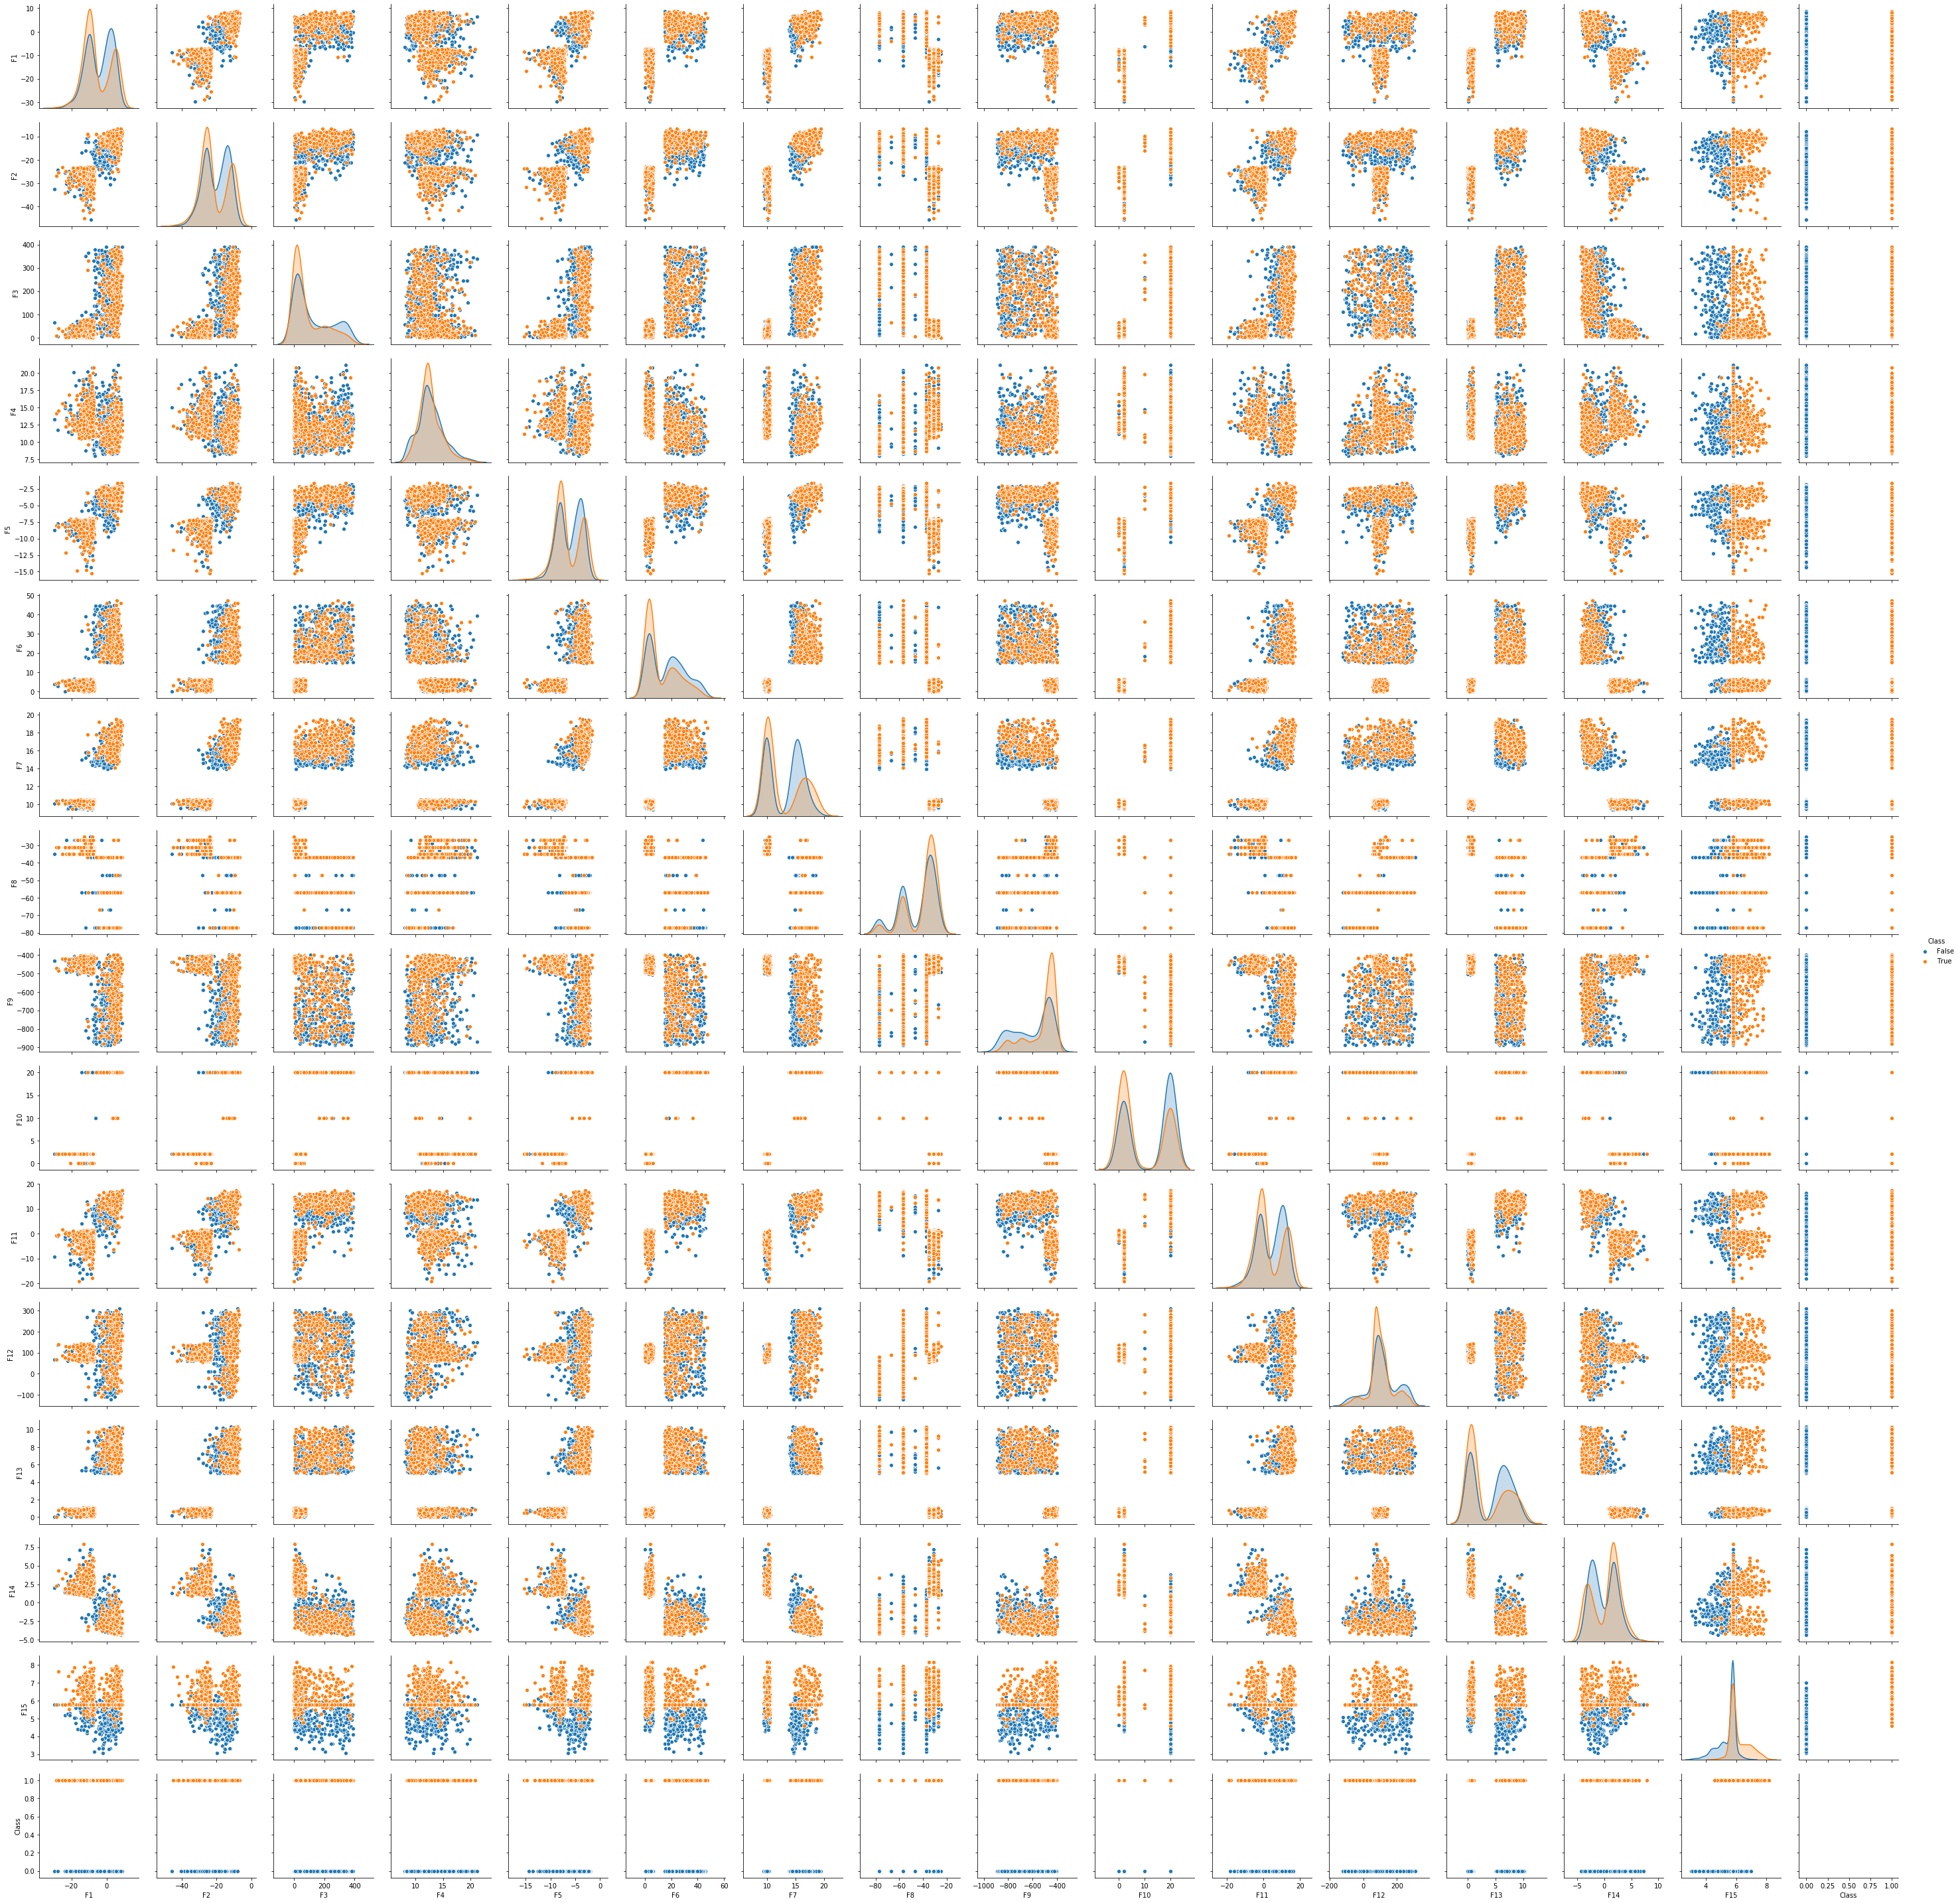

In [7]:
sns.pairplot(df, hue ='Class')

seperating the input and target features

In [8]:
df_input=df.drop(['Class'],axis=1)
df_target=df['Class']
print(df_input.head())
print(df_target.head())

      F1     F2   F3     F4    F5     F6     F7     F8      F9  F10   F11  \
0   4.92 -13.23  330  13.22 -5.51  41.10  16.72 -56.98 -748.72   20  9.75   
1  -9.33 -27.72    3  12.78 -9.12   5.31   9.90 -30.98 -436.72    2 -1.56   
2 -15.09 -26.28    6  13.54 -7.75   5.67   9.93 -34.98 -482.72    2 -2.58   
3 -18.09 -24.60   30  13.28 -8.61   3.51  10.02 -30.98 -414.72    2 -7.08   
4   6.12  -8.64  300  14.94 -1.97  29.40  19.32 -36.98 -428.72   20  9.09   

      F12   F13   F14       F15  
0  259.66  8.00 -0.35  4.760000  
1  131.66  0.76  1.79  5.783013  
2   63.66  0.64  2.02  5.783013  
3  133.66  0.57  1.98  5.783013  
4  229.66  6.70 -3.83  5.783013  
0    False
1    False
2     True
3     True
4     True
Name: Class, dtype: bool


# DECISION TREE CLASSIFIER

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_input, df_target, test_size=0.3,random_state=1)

In [11]:
X_train.shape, X_test.shape

((1050, 15), (450, 15))

In [51]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Creating Decision Tree classifer object
clf = DecisionTreeClassifier()

# Training Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predicting the response for test dataset
y_pred = clf.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [53]:
def eval_model(dt_clf):
    print("Train Accuracy :", accuracy_score(y_train, dt_clf.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_clf.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_clf.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_clf.predict(X_test)))

In [54]:
eval_model(clf)

Train Accuracy : 1.0
Train Confusion Matrix:
[[555   0]
 [  0 495]]
--------------------------------------------------
Test Accuracy : 0.8022222222222222
Test Confusion Matrix:
[[208  46]
 [ 43 153]]


In [55]:
#finding the best parameters using gricd search cross validation
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [3,5,6,10,12,15, 20, 30],
    'min_samples_leaf': [3, 10,12, 15,20,25, 35, 70],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 128 candidates, totalling 512 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 10, 12, 15, 20, 30],
                         'min_samples_leaf': [3, 10, 12, 15, 20, 25, 35, 70]},
             scoring='accuracy', verbose=1)

In [56]:
dt_best = grid_search.best_estimator_

In [57]:
dt_best #best parameters

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=25)

TEST SET

In [21]:
df_test= pd.read_csv("D:\CE802\CE802_P2_Data\CE802_P2_Test.csv")
df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-8.67,-25.56,21,13.14,-7.45,5.55,10.29,-30.98,-476.72,2,-1.17,61.66,0.23,3.76,7.60,NaN
1,-8.31,-29.19,10,12.16,-7.66,5.22,10.22,-30.98,-422.72,2,-0.96,79.66,0.02,1.22,6.72,NaN
2,-0.84,-25.29,110,12.34,-3.72,20.70,17.32,-76.98,-778.72,20,11.10,-20.34,5.75,-1.97,NaN,NaN
3,0.90,-14.94,120,9.44,-3.44,28.05,15.52,-56.98,-858.72,20,6.33,229.66,8.05,-1.77,NaN,NaN
4,-0.33,-9.60,345,14.26,-3.32,34.80,15.07,-36.98,-458.72,20,12.18,129.66,9.80,-2.17,6.60,NaN


In [22]:
df_test.isnull().sum()

F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
F11         0
F12         0
F13         0
F14         0
F15       750
Class    1500
dtype: int64

In [23]:
df_test_input=df_test.drop(['Class'],axis=1)
df_test_target=df_test['Class']
print(df_test_input.head())
print(df_test_target.head())

     F1     F2   F3     F4    F5     F6     F7     F8      F9  F10    F11  \
0 -8.67 -25.56   21  13.14 -7.45   5.55  10.29 -30.98 -476.72    2  -1.17   
1 -8.31 -29.19   10  12.16 -7.66   5.22  10.22 -30.98 -422.72    2  -0.96   
2 -0.84 -25.29  110  12.34 -3.72  20.70  17.32 -76.98 -778.72   20  11.10   
3  0.90 -14.94  120   9.44 -3.44  28.05  15.52 -56.98 -858.72   20   6.33   
4 -0.33  -9.60  345  14.26 -3.32  34.80  15.07 -36.98 -458.72   20  12.18   

      F12   F13   F14   F15  
0   61.66  0.23  3.76  7.60  
1   79.66  0.02  1.22  6.72  
2  -20.34  5.75 -1.97   NaN  
3  229.66  8.05 -1.77   NaN  
4  129.66  9.80 -2.17  6.60  
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Class, dtype: float64


In [24]:
#replacing the missing values of input features with mean
df_test_input.fillna(df_test_input.mean(), inplace=True)

In [58]:
#predictions on test(validation set)
dt_best=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=25)
dt_best.fit(X_train,y_train)
dt_pred=dt_best.predict(X_test)
dt_pred[1:10]

array([False, False,  True, False, False,  True, False, False,  True])

In [59]:
#prediction of customer class on unseen dataset
predictions = dt_best.predict(df_test_input)

In [60]:
predictions

array([ True,  True, False, ...,  True, False,  True])

In [61]:
print("Test Accuracy :", accuracy_score(y_test, dt_pred))

Test Accuracy : 0.8044444444444444


The accuracy on the test set using decision tree classifier is 80.44%

# RANDOM FOREST CLASSIFIER

In [30]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [31]:
clf_rf = RandomForestClassifier(random_state=40)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=40)

In [32]:
ypred_rf = clf_rf.predict(X_test)

In [33]:
#running cross validation
clf_rf_cv_score = cross_val_score(clf_rf, df_input, df_target, cv=10, scoring='roc_auc')

In [34]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, ypred_rf))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, ypred_rf))
print('\n')
print("=== All AUC Scores ===")
print(clf_rf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", clf_rf_cv_score.mean())
print('\n')
print("=== Accuracy ===")
print(accuracy_score(y_test, ypred_rf))

=== Confusion Matrix ===
[[218  36]
 [ 26 170]]


=== Classification Report ===
              precision    recall  f1-score   support

       False       0.89      0.86      0.88       254
        True       0.83      0.87      0.85       196

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



=== All AUC Scores ===
[0.91680086 0.94211845 0.95178028 0.95616389 0.96528896 0.96958311
 0.90338164 0.94471283 0.92673108 0.95732143]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9433882530736397


=== Accuracy ===
0.8622222222222222


Tuning hyper parameters for better results

In [35]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] #number of decision trees
max_features = ['auto', 'sqrt'] #features at each split
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)] #maximum depth
max_depth.append(None)
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
clf_rf_random = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                                verbose=2, random_state=42, n_jobs = -1)
clf_rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=40),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [100, 140, 180, 220, 260,
                                                      300, 340, 380, 420, 460,
                                                      500, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [36]:
print(clf_rf_random.best_params_) #finding the best parameters

{'n_estimators': 1400, 'max_features': 'auto', 'max_depth': 100}


In [38]:
#making predictions on unseen test set
predictions_rf = clf_rf_best.predict(df_test_input)
print(predictions)

[ True  True  True ...  True False False]


In [37]:
#evaluating the best paramenters of random forest
clf_rf_best = RandomForestClassifier(n_estimators=1400, max_depth=100, max_features='auto',random_state=40)
clf_rf_best.fit(X_train,y_train)
clf_rf_best_predict = clf_rf_best.predict(X_test)
clf_rf_best_cv_score = cross_val_score(clf_rf_best, df_input, df_target, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, clf_rf_best_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, clf_rf_best_predict))
print('\n')
print("=== All AUC Scores ===")
print(clf_rf_best_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", clf_rf_best_cv_score.mean())
print('\n')
print("=== Accuracy ===")
print(accuracy_score(y_test, clf_rf_best_predict))

=== Confusion Matrix ===
[[222  32]
 [ 29 167]]


=== Classification Report ===
              precision    recall  f1-score   support

       False       0.88      0.87      0.88       254
        True       0.84      0.85      0.85       196

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



=== All AUC Scores ===
[0.91697978 0.94489175 0.95920558 0.95509036 0.96457327 0.97235641
 0.90722848 0.95419574 0.93299338 0.95785714]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9465371903995093


=== Accuracy ===
0.8644444444444445


The accuracy on the test set using decision tree classifier is 86.44%. This score is better than that of the decision tree.

# NAIVE BAYES CLASSIFIER

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
clf_nb = GaussianNB()
clf_nb.fit(X_train,y_train)

GaussianNB()

In [41]:
pred_nb=clf_nb.predict(X_test)

In [42]:
accuracy_nb=accuracy_score(y_test,pred_nb)
accuracy_nb

0.6066666666666667

In [43]:
#tuning the hyperparameters for best results
param_grid_nb = {
    'var_smoothing': np.logspace(0,-20, num=100)
}
nb_clf_grid = GridSearchCV(estimator=clf_nb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nb_clf_grid.fit(X_train, y_train)
print(nb_clf_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=3.4304692863149193e-07)


In [44]:
#using best parameters to train the data
clf_nb_best=GaussianNB(var_smoothing=3.4304692863149193e-07)
clf_nb_best.fit(X_train,y_train)

GaussianNB(var_smoothing=3.4304692863149193e-07)

In [45]:
#predicting on the test(validation dataset)
pred_nb_best=clf_nb_best.predict(X_test)

In [46]:
#predicting on the unseen dataset
clf_nb_pred= clf_nb_best.predict(df_test_input)
clf_nb_pred[1:10]

array([ True, False, False, False,  True, False,  True, False, False])

In [47]:
accuracy_nb_best=accuracy_score(y_test,pred_nb_best)
accuracy_nb_best

0.6066666666666667

comparing the accuracies of all the three models

In [62]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Score': [accuracy_score(y_test, dt_best.predict(X_test)),accuracy_score(y_test, clf_rf_best_predict),accuracy_nb_best]
                             })
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.864444
0,Decision Tree,0.804444
2,Naive Bayes,0.606667


Therefore the accuracy of random forest classifier is the highest and is suitable to classify the new customer based on the items purchased.

In [49]:
#saving the predictions of random forest to test data
df_test['Class'] = predictions_rf
df_test.to_csv('CE802_P2_Test.csv')